### Multiple linear regression code for bacterial dataset

In [1]:
#Import python libraries/packages

# Pandas to handle dataframes
import pandas as pd    

# Import Scikit-Learn library for the regression model
import sklearn         
from sklearn import preprocessing #sklearn for normalization function
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# SequentialFeatureSelector
from sklearn.feature_selection import f_regression, SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Import numpy 
import numpy as np


# Another statistic model library
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
import scipy
from scipy import interpolate
from scipy.interpolate import interp1d


# Import plotting libraries
import matplotlib 
from matplotlib import pyplot as plt
# Set larger fontsize for all plots
matplotlib.rcParams.update({'font.size': 18})

In [2]:
import sklearn
print(sklearn.__version__)

0.24.1


In [3]:
# Open and load dataset
bacterial_csv = pd.read_csv('compiled_features_complete.csv')
df = pd.DataFrame(data=bacterial_csv)
df

,Unnamed: 0,GENENAME,ORG,ENTREZID,REFSEQ,LOG2FC,True_EID,SEQUENCE,AA_NP,AA_POS,AA_POL,AA_NEG,MW,AROM,ISO_E
0,0,ABC_transporter,PA,879411,NP_248876,-0.038469,15595384,mkaltssllglfaapvlagllgayvplasaappkeiriavpdvsag...,59.773371,11.614731,17.847025,10.764873,37193.0756,0.070822,6.871061
1,1,ABC_transporter,PA,883108,NP_248894,-0.207718,15595400,mhqriasiglgltlalggsaqaagqlnvvswsgyfspqllekfeke...,54.941860,11.337209,22.674419,11.046512,37859.8560,0.093023,6.033937
2,2,ABC_transporter,PA,878380,NP_249014,-0.187309,15595520,mtyrtpltllfaaglalggqaraegtlhfanwsdyyppellkkfek...,52.449568,14.121037,20.461095,12.968300,38901.0268,0.112392,6.350359
3,3,ABC_transporter,PA,880771,NP_249293,0.085173,15595799,mlpamrtgllcallgvtapawaeyvtvisfggankeaqetafykpf...,59.593023,11.918605,17.732558,10.755814,37832.8132,0.116279,6.919602
4,4,ABC_transporter,PA,879023,NP_249295,0.038834,15595801,mskslkaaslkfatlaaglacaaqamavdltvvsfgganksaqika...,54.310345,11.494253,22.413793,11.781609,38166.9526,0.112069,5.869103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,431,RNA_polymerase,BS,939937,NP_388354,-0.055848,728883360,mtqpskttkltkdevdrlisdyqtkqdeqaqetlvrvytnlvdmla...,42.748092,16.030534,24.809160,16.412214,29900.8971,0.049618,5.545803
432,432,RNA_polymerase,BS,936362,NP_391300,-0.140629,728886343,mdmklqqvqvlkpqltqelrqaitllgyhsaelaeyidelslenpl...,43.807339,15.596330,27.752294,12.844037,49700.0669,0.064220,7.716086
433,433,RNA_polymerase,BS,938729,NP_390226,-0.528350,728885268,mdvevkkngknaqlkdhevkelikqsqngdqqardllieknmrlvw...,43.137255,16.862745,21.568627,18.431373,29372.0675,0.058824,5.252059
434,434,RNA_polymerase,BS,939953,NP_389416,0.303125,728884442,msrnkveicgvdtsklpvlkneemrklfrqlqdegddsareklvng...,45.384615,16.153846,21.923077,16.538462,30073.0463,0.061538,5.632312


In [58]:
#assign input (X) /output (y) features
#X= df[['AA_NP','AA_POS','AA_NEG', 'AA_POL', 'MW', 'AROM', 'ISO_E']]

#selector, 6 input features
X= df[['AA_NP','AA_POS','AA_NEG', 'AA_POL', 'MW', 'ISO_E']]

#selector, 5 input features
#X= df[['AA_POS','AA_NEG', 'AA_POL', 'MW', 'ISO_E']]

#selector, 4 input features
#X= df[['AA_POS','AA_POL', 'MW', 'ISO_E']]

#selector, 2 input features
#X= df[['AA_POL', 'ISO_E']]

y= df['LOG2FC']


#Change as you decrease/select input features!!
Nfeat = 6

#### Scale input features (Rory will write a function, need to implement later)
for now just do a jupyter notebook lines

In [59]:
X_arr = X.values #returns a numpy array for X (needed to use the min_max_scaler)

X_col_names = list(X.columns.values.tolist()) #get column names to then put back into X_norm

#min-max normalization (rescaling) of input features
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X_arr)
X_norm= pd.DataFrame(X_scaled)

#put back the original column names
X_norm.columns = X_col_names

X = X_norm

In [60]:
X

,AA_NP,AA_POS,AA_NEG,AA_POL,MW,ISO_E
0,0.560010,0.473362,0.223260,0.250886,0.208999,0.380891
1,0.452176,0.457427,0.231083,0.387387,0.213203,0.267864
2,0.396551,0.617272,0.284465,0.324803,0.219767,0.310587
3,0.555985,0.490810,0.223009,0.247650,0.213032,0.387445
4,0.438081,0.466444,0.251502,0.380018,0.215139,0.245608
...,...,...,...,...,...,...
431,0.180024,0.726915,0.380126,0.447750,0.163027,0.201957
432,0.203666,0.701983,0.281013,0.530971,0.287848,0.494985
433,0.188710,0.774700,0.436212,0.356120,0.159693,0.162296
434,0.238869,0.733995,0.383633,0.366142,0.164112,0.213637


#### Function to do multiple linear regression (need to specify the split ratio and random_state values)
multilinregr_noCV(test_ratio, seed_random)

In [61]:
def multilinregr_noCV(test_ratio, seed_random, X, y):
#takes in data split ratio and random state seed
#returning the split X and y, as well as the predicted output
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=seed_random, shuffle=True)
    #prediction made is multiple linear regression
    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    mlr_params = [model.coef_,model.intercept_]
    
    return X_train, X_test, y_train, y_test, y_predict, mlr_params

In [74]:
#output from function:

test_ratio = 0.2
seed_random = 5
X_train, X_test, y_train, y_test, y_predict, mlr_params = multilinregr_noCV(test_ratio, seed_random, X, y)

In [75]:
len(y_predict)

88

In [71]:
y_test

241    0.040464
354    0.116968
391   -0.260298
21    -0.003602
318   -0.008017
         ...   
280    0.125803
11     0.034091
17     0.008900
67    -0.041608
344   -1.189207
Name: LOG2FC, Length: 175, dtype: float64

In [76]:
MLR_coeffs = mlr_params[0]
MLR_intercept = mlr_params[1]
#print the regression coefficients (beta values) and intercept (beta zero)
print(f"The multiple linear regression coefficients are {MLR_coeffs}")
print(f"The multiple linear regression intercept is {MLR_intercept}")

The multiple linear regression coefficients are [-7.22896621e+13 -2.80989731e+13 -5.80849924e+13 -5.70591973e+13
 -6.00585938e-02 -6.64062500e-02]
The multiple linear regression intercept is 81067342682888.48


#### if run without MLR function

In [77]:
'''
#split train:test dataset 80%:20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

#Define method and fit to the train set

#Model is linear reg
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

#print the regression coefficients (beta values) and intercept (beta zero)
print("The multiple linear regression coefficients are" % model.coef_)
print("The multiple linear regression intercept is" % model.intercept_)
'''

'\n#split train:test dataset 80%:20%\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)\n\n#Define method and fit to the train set\n\n#Model is linear reg\nmodel = linear_model.LinearRegression()\nmodel.fit(X_train, y_train)\ny_predict = model.predict(X_test)\n\n#print the regression coefficients (beta values) and intercept (beta zero)\nprint("The multiple linear regression coefficients are" % model.coef_)\nprint("The multiple linear regression intercept is" % model.intercept_)\n'

#### Evaluate model

In [78]:
#Evaluate model and report performance

# Calculate mean squared error
print('Multiple linear regression MSE: %.2f' % mean_squared_error(y_test, y_predict))

#calculate R^2 value (best value = 1, negative if we have huge error)
print('Coefficient of determination (R^2 value): %.2f' % r2_score(y_test, y_predict))

Multiple linear regression MSE: 0.06
Coefficient of determination (R^2 value): 0.03


#### Check y_test and y_predict per input features

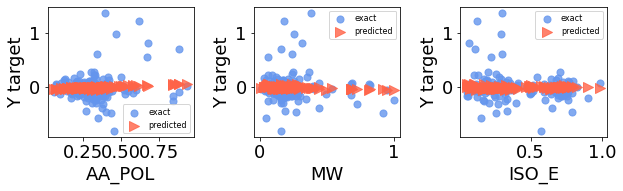

In [48]:
# Plot LogFC output feature per input feature
feature_names = np.array(list(X.columns))
fig, ax = plt.subplots(1,Nfeat,figsize=(Nfeat*3,3))
for i in range(Nfeat):
  
    ax[i].scatter(X_test.iloc[:,i], y_test, s=50, marker='o', color="cornflowerblue", alpha=0.8, label="exact")
    ax[i].scatter(X_test.iloc[:,i], y_predict, s=100, marker='>', color="tomato", alpha=0.8, label="predicted")
    ax[i].set_xlabel(feature_names[i])
    ax[i].set_ylabel('Y target')
    ax[i].legend(fontsize=8)

plt.tight_layout()

#### F-statistic_ to estimate relationship between response and predictors

In [253]:
mreg = sm.OLS(y_train, X_train).fit()
mreg.summary(alpha=0.1) # Set significance level

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 LOG2FC   R-squared (uncentered):                   0.013
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              1.315
Date:                Fri, 12 Mar 2021   Prob (F-statistic):                       0.270
Time:                        15:21:33   Log-Likelihood:                         -63.454
No. Observations:                 305   AIC:                                      132.9
Df Residuals:                     302   BIC:                                      144.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|       [0.05       0.95]
------------------------------------------------------------------------------
AA_POL         0.1397      0.075      1.862      0.064       0.016       0.264
MW            -0.1275      0.093     -1.370      0.172      -0.281       0.026
ISO_E         -0.0502      0.052     -0.959      0.338      -0.137       0.036
==============================================================================
Omnibus:                       99.041   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.893
Skew:                           1.194   Prob(JB):                    7.26e-127
Kurtosis:                       9.325   Cond. No.                         3.71
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Function to plot test and prediction output: plot_prediction(y_test, y_predict) 

In [243]:
def plot_prediction(y_test, y_predict):
#the function will plot prediction and test output data
#to see how acurrate the prediction data are
    x_ax = range(len(y_test))
    plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
    plt.plot(x_ax, y_predict, lw=0.8, color="red", label="predicted")
    plt.legend(loc='upper right', prop={'size': 10})
    plt.show()

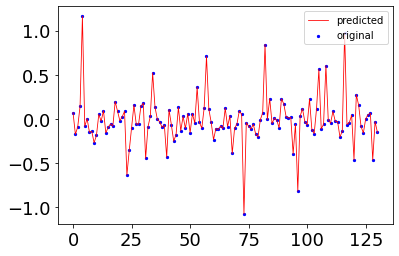

In [254]:
#Example of using function
test_data = y_test
pred_data = y_predict
plot_pred = plot_prediction(test_data, test_data)

#### If MSE and R^2 is bad, try selecting important import features with Forward stepwise selection

In [208]:
#Find the most important input features

#number of features to select
feat_select = 3

#Forward stepwise selection
sfs_forward = SequentialFeatureSelector(linear_model.LinearRegression(), 
                                        n_features_to_select=feat_select,
                                        direction='forward').fit(X, y)

f_names = np.array(list(df.columns[8:15]))
#will print T/F boolean, T being important feature
print(sfs_forward.get_support(),"\n")
#print indices of important input features
selected = sfs_forward.get_support(indices=True)
print(selected)
#print names of important input feature
print("Selected input features using Forward Stepwise Selection:\n", f_names[selected])


[False False  True False  True False  True] 

[2 4 6]
Selected input features using Forward Stepwise Selection:
 ['AA_POL' 'MW' 'ISO_E']
